In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

op = webdriver.ChromeOptions()
op.add_argument('--headless')
op.add_argument('--no-sandbox')
op.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=op)

url = "https://finance.yahoo.com/quote/%5EIXIC/history/"
driver.get(url)
wait = WebDriverWait(driver, 15)
rows = wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, "tr")))

finance_data={}
my_data=[]

for row in rows[1:]:
    cells = row.find_elements(By.TAG_NAME, "td")
    date = cells[0].text           # 날짜 (Date)
    open = float(cells[1].text.replace(',', ''))      # 시가 (Open)
    close = float(cells[4].text.replace(',', ''))     # 종가 (Close)
    ratio = ((close - open) / open) * 100             # 등락률 (in_de)
    finance_data={"Date": date, "Open": open, "Close": close, "in_de": round(ratio, 2)}
    my_data.append(finance_data) #데이터 통합


driver.quit()
print(my_data)


[{'Date': 'Jan 9, 2026', 'Open': 23496.21, 'Close': 23671.35, 'in_de': 0.75}, {'Date': 'Jan 8, 2026', 'Open': 23548.88, 'Close': 23480.02, 'in_de': -0.29}, {'Date': 'Jan 7, 2026', 'Open': 23544.89, 'Close': 23584.28, 'in_de': 0.17}, {'Date': 'Jan 6, 2026', 'Open': 23446.96, 'Close': 23547.17, 'in_de': 0.43}, {'Date': 'Jan 5, 2026', 'Open': 23449.67, 'Close': 23395.82, 'in_de': -0.23}, {'Date': 'Jan 2, 2026', 'Open': 23481.49, 'Close': 23235.63, 'in_de': -1.05}, {'Date': 'Dec 31, 2025', 'Open': 23420.85, 'Close': 23241.99, 'in_de': -0.76}, {'Date': 'Dec 30, 2025', 'Open': 23465.67, 'Close': 23419.08, 'in_de': -0.2}, {'Date': 'Dec 29, 2025', 'Open': 23414.68, 'Close': 23474.35, 'in_de': 0.25}, {'Date': 'Dec 26, 2025', 'Open': 23645.91, 'Close': 23593.1, 'in_de': -0.22}, {'Date': 'Dec 24, 2025', 'Open': 23555.95, 'Close': 23613.31, 'in_de': 0.24}, {'Date': 'Dec 23, 2025', 'Open': 23407.7, 'Close': 23561.84, 'in_de': 0.66}, {'Date': 'Dec 22, 2025', 'Open': 23450.53, 'Close': 23428.83, 'in_

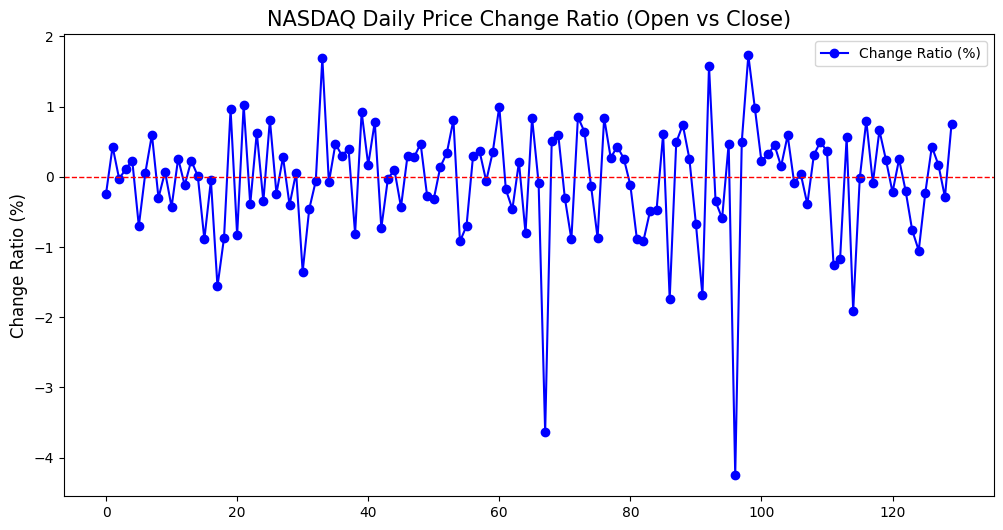

In [41]:
import matplotlib.pyplot as plt

my_data1 = my_data[:130]
dates = [d['Date'] for d in my_data1]
ratios = [d['in_de'] for d in my_data1]

# 2. 데이터 정렬 (웹에서 가져온 데이터는 최신순이므로 과거순으로 뒤집기)
dates.reverse()
ratios.reverse()

plt.figure(figsize=(12, 6))
plt.plot(ratios, marker='o', linestyle='-', color='b', label='Change Ratio (%)')

plt.title('NASDAQ Daily Price Change Ratio (Open vs Close)', fontsize=15)
plt.ylabel('Change Ratio (%)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend()

plt.show()
del my_data1
